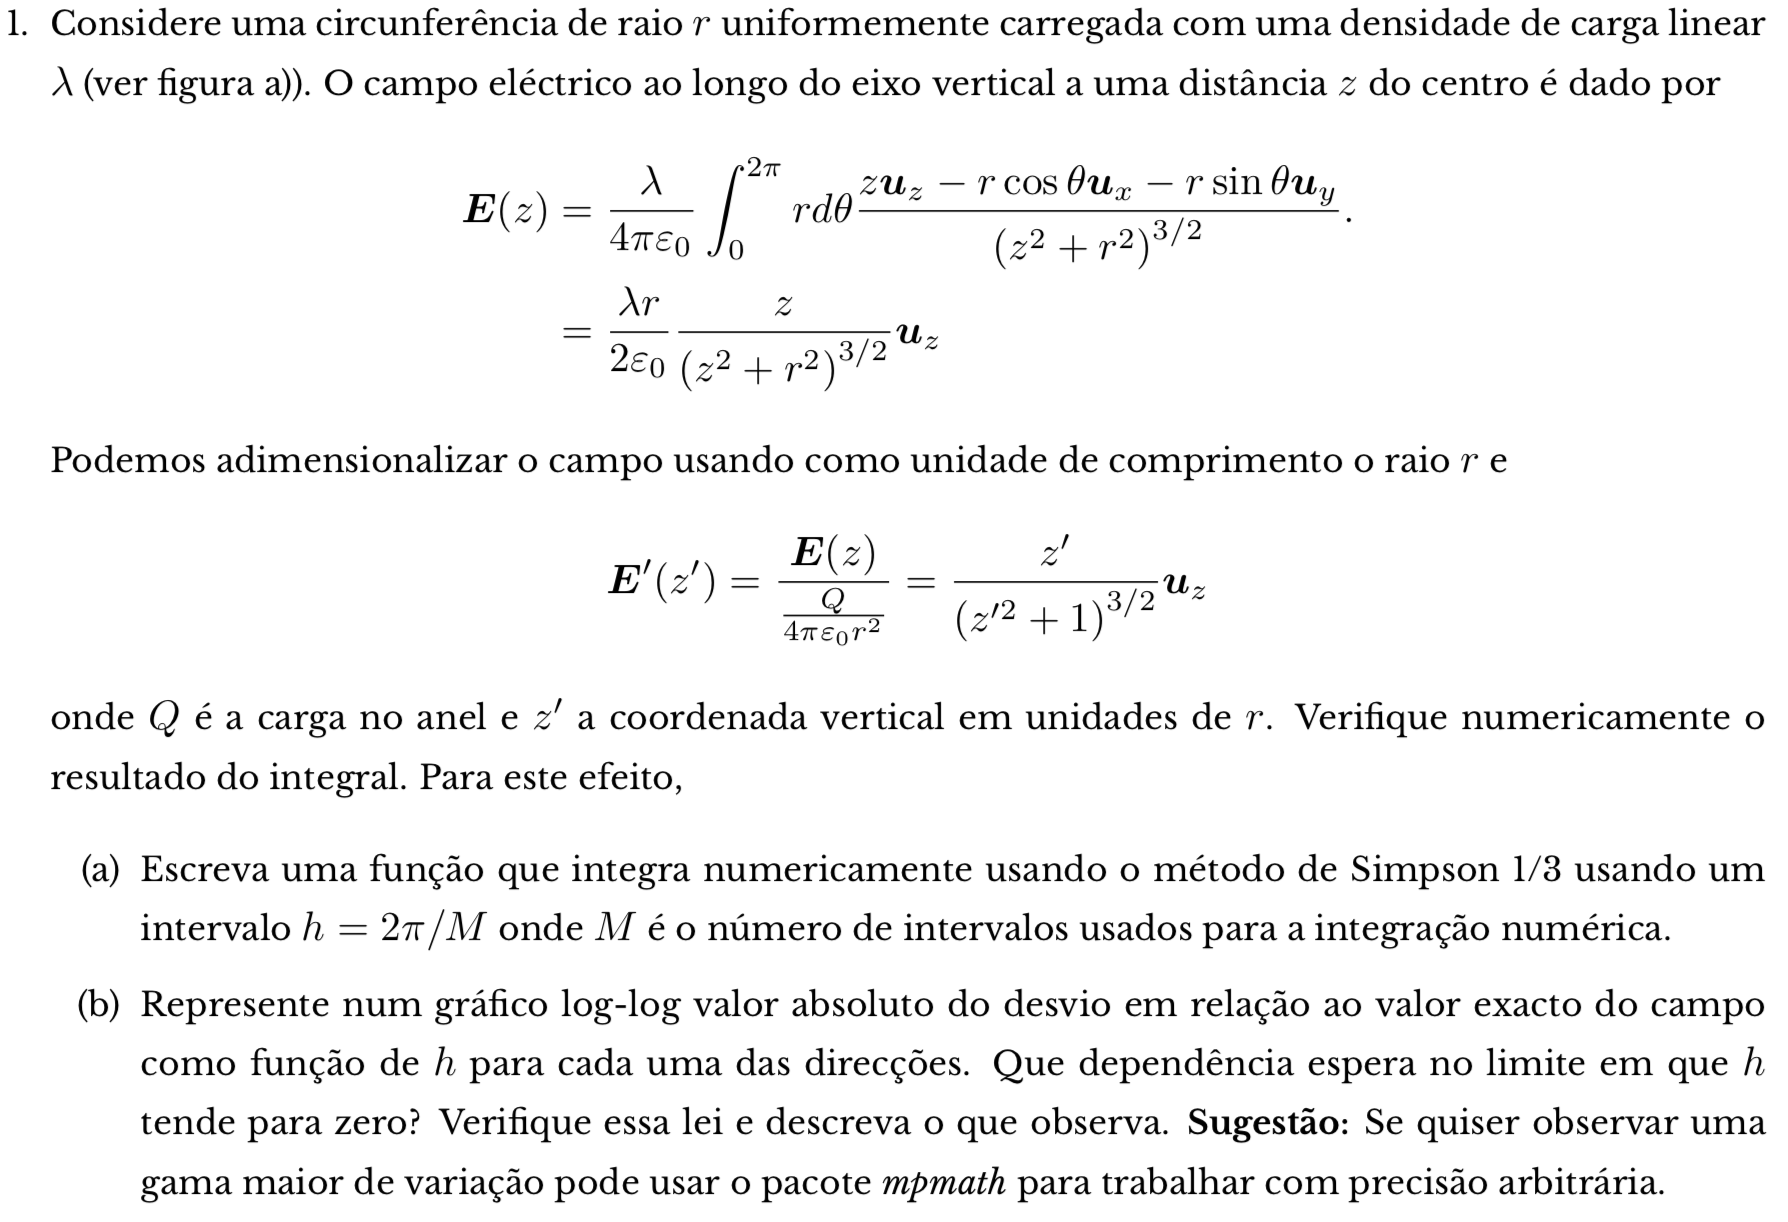

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

# 1.1.a)

Separamos a integral segundo as componentes em $\textbf{u}_z$, $\textbf{u}_x$ e $\textbf{u}_y$, respetivamente. Em unidades de $r$:

Segundo $\textbf{u}_x$ temos

$E_x'(z')= \frac{1}{2 \pi} \int_{0}^{2 \pi} d \theta \frac{-\cos \theta}{\left({z'}^{2}+ 1 \right)^{3 / 2}}$.

Esperamos um valor nulo para esta componente do campo.

In [4]:
# Construimos uma função integradora pelo método de Simpson.
def simpson(f, a, b, N, z = 1):
    N = N // 2 * 2
    h = (b - a) / N
    theta = np.arange(a, b + h/2, h)
    y = f(theta, z)
    return (h / 3) * (y[0] + y[-1] + 4*y[1:-1: 2].sum() + 2*y[2:-1:2].sum())

In [5]:
def f_x(theta, z):
    return - np.cos(theta) / (z*z + 1)**1.5

Graficamente, $E_x'$ rapidamente tende para o valor esperado:

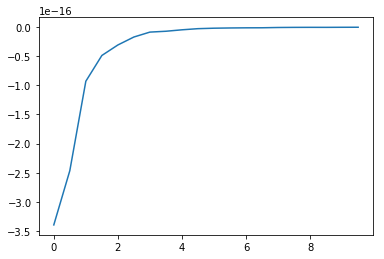

In [6]:
z = np.arange(0, 10, .5)
E_x = .0 * z
for i in range(len(z)):
    E_x[i] = simpson(f_x, 0, 2*np.pi, 100, z[i])
plt.plot(z, E_x)

Segundo $\textbf{u}_y$ temos

$E_y'(z')= \frac{1}{2 \pi} \int_{0}^{2 \pi} d \theta \frac{-\sin \theta}{\left({z'}^{2}+ 1 \right)^{3 / 2}}$.

Esperamos um valor nulo para esta componente do campo.

In [7]:
def f_y(theta, z):
    return - np.sin(theta) / (z*z + 1)**1.5

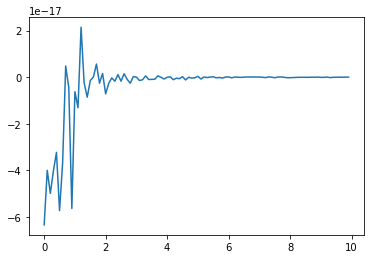

In [8]:
z = np.arange(0, 10, .1)
E_y = .0 * z
for i in range(len(z)):
    E_y[i] = simpson(f_y, 0, 2 *np.pi, 100, z[i])
plt.plot(z, E_y)

Já segundo $\textbf{u}_z$:

$E_z'(z')= \frac{1}{2 \pi} \int_{0}^{2 \pi} d \theta \frac{z'}{\left({z'}^{2}+ 1 \right)^{3 / 2}}$.

Isto resume-se a calcular a integral $ \int_0^{2 \pi} d \theta$. A mesma análise é então desnecessária pois a integral não depende de $\theta$.

# 1.1.b)

 Mais uma vez, analisaremos as compenentes $E_x', E_y', E_z'$, respetivamente.

A componente $E_x$:

In [9]:
#Definimos uma função que imprima o desvio em módulo do valor esperado.
def get_error(f, exact_result, r_i = 0, r_f = 2 * np.pi , N_i = 2, N_f = 15):
    Ns = 2**np.linspace(N_i, N_f)
    Hs = (r_f - r_i) / Ns
    E_f = np.linspace(N_i, N_f)
    for i, n in enumerate(Ns):
        E_f[i] = simpson(f, r_i, r_f, n)
    plt.plot(Hs, abs(E_f + exact_result))
    plt.yscale("log")
    plt.xscale("log")

Integral de $ \theta \in [0, 2\pi]$.

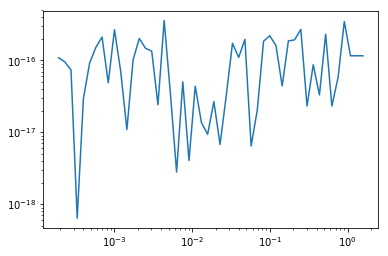

In [10]:
get_error(f_x, 0)

A componente $E_y$:

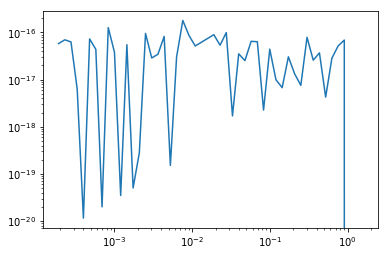

In [11]:
get_error(f_y, 0)

É de notar que epesar de haver flutuação, esta é à volta do limite de precisão da máquina, aproximadamente $10^{-16}$.

Este é o comportamento esperado, pois as integrais são simétricas e o erro anula-se. As flutuações são quase aleatórias e de valor muito pequeno.

# 1.c)
Para a integral em $\theta \in [0, \pi]$.

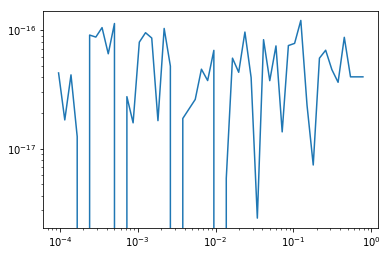

In [12]:
get_error(f_x, 0, r_f = np.pi)

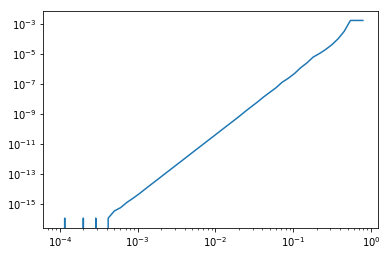

In [13]:
get_error(f_y, 1/np.sqrt(2), r_f = np.pi)

Nesta última integral, temos oportunidade de ver como o desvio decresce com a diminuição de $h$, até atingir as limitações da precisão da máquina, apresentando depois flutuações que poderão surgir de erros de truncatura.

Adicionalmente, por comparação vemos que o erro decresce com $h^4$, tal como esperado.

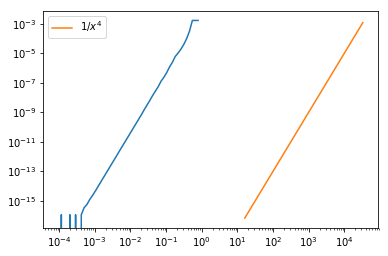

In [14]:
get_error(f_y, 1/np.sqrt(2), r_f = np.pi)
Ns = 2**np.linspace(4, 15)
Hs = np.pi / Ns
E_f = 1e-21 * (Ns) ** (4)
plt.plot(Ns, E_f, label="$1/x^4$")
plt.xscale("log")
plt.yscale("log")
plt.legend()

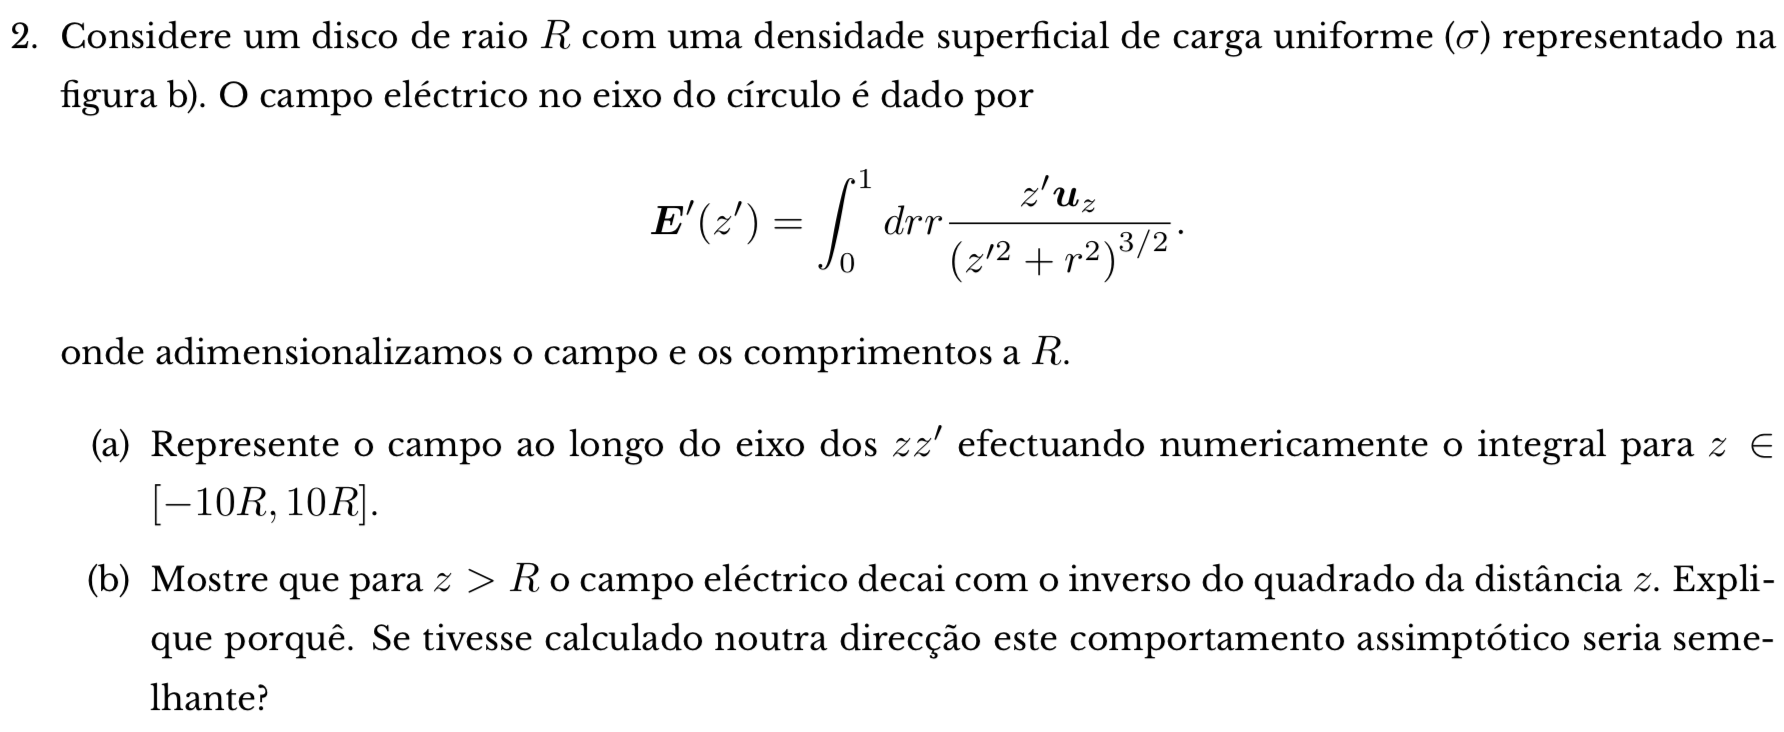

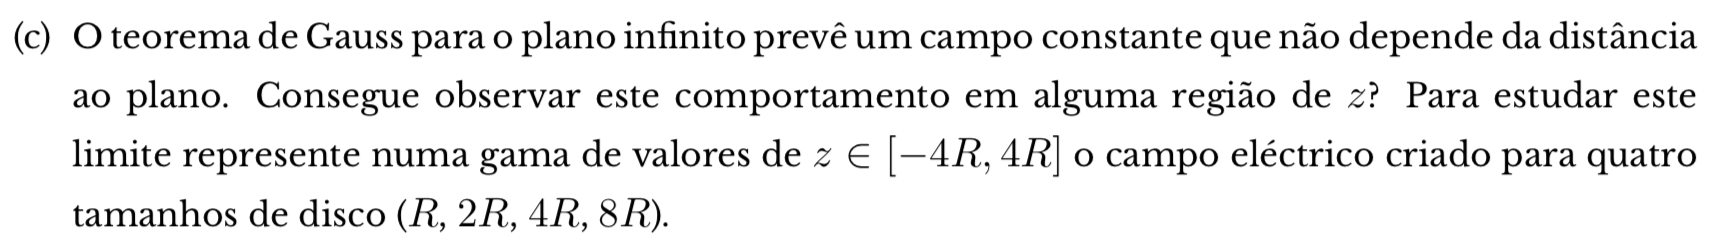

# 1.2.a)

In [15]:
#Definimos convenientemente uma função integradora
def simpson(f, a, b, N, z = 1):
    N = N // 2 * 2
    h = (b - a) / N
    x = np.arange(a, b + h, h)
    y = f(x, z)
    return (h / 3) * (y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-1:2].sum())

#Função a integrar do campo de um disco na posição r_0
def En(z, r, r_0 = 0):
    return (r - r_0) * z / (z*z + (r-r_0)**2)**1.5

In [16]:
#Função que integra e desenha a funçao dado em função de z
def get_field(f, r_i = 0, r_f = 1, dN = 1000, z_i = -10, z_f = 10, dz = 1000, l=None):
    Zs = np.linspace(z_i, z_f, dz)
    E_f = np.linspace(z_i, z_f, dz)
    for i, z in enumerate(Zs):
        E_f[i] = simpson(f, r_i, r_f, dN, z)
    plt.plot(Zs, E_f, label=l)
    if l != None:
        plt.legend()

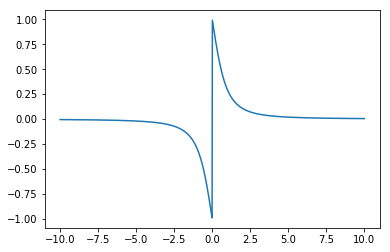

In [17]:
get_field(En)

# 1.2.b)

Comparamos graficamente com a função $f(z) = 1/z^2$.

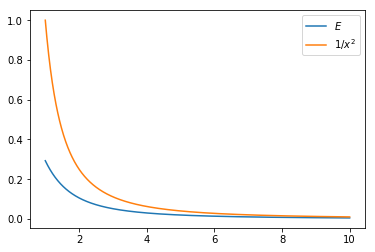

In [18]:
get_field(En, z_i = 1, l="$E$")
Zs = np.linspace(1, 10, 1000)
f = lambda x: 1 / x**2 #Ajuste
y = f(Zs)
plt.plot(Zs, y, label="$1/x^2$")
plt.legend()

O ajuste não é perfeito! Tentamos então optimizar uma função de ajuste $f(z)=ax^c + b$.

In [19]:
def fit_func(x, a, b, c):
    return a / x**c + b

In [20]:
#Constuimos uma função que  parametrize e desenhe um ajuste.
def get_fit(f, z_i=1, z_f=10, dz = 100, r_i = 0, r_f = 1, dN=100, param0=[1, 0, 2]):
    Zs = np.linspace(z_i, z_f, dz)
    Es = np.linspace(z_i, z_f, dz)
    for i, z in enumerate(Zs):
        Es[i] = abs(simpson(f, r_i, r_f, dN, z))
    w, w_ = opt.curve_fit(fit_func, Zs, Es, p0=param0)
    W = fit_func(Zs, w[0], w[1], w[2]) 
    plt.plot(Zs[::5], Es[::5], label="$E$", marker="o", markersize=4, linestyle="")
    plt.plot(Zs, W, label = "1/x^{:.2f}".format(w[2]))
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    print("Params: a = {0}, b = {1}, c = {2}".format(w[0], w[1], w[2]))

Para raios $z \in [1R,10R]$.

Params: a = 0.3108415160814792, b = -0.007380010882271626, c = 1.4869991157644935


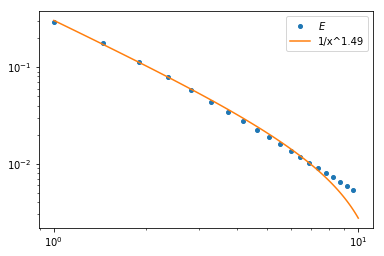

In [21]:
get_fit(En)

Este não é o comportamento esperado. Contudo, isto deve-se ao facto de $z = R$ não ser suficientemente distante da placa para ter uma tendência de $1/x^2$.

Já para $z \in [10R,50R]$.

Params: a = 0.485495004844228, b = -2.5526580012419153e-06, c = 1.990039317570448


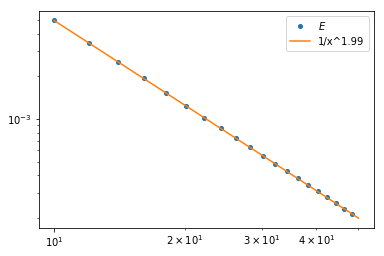

In [22]:
get_fit(En, z_i = 10, z_f = 50)

Obtemos assim o comportamento esperado. Este não choca com a intuicção, pois para raios suficientemente grandes, o campo de uma placa aproxima-se ao de uma partícula pontual. Isto é facilmente verificado por uma expansão em série de Taylor para $z>>R$.

Já noutras direções, o comportamento assintótico seria diferente. Usando o resultado de eletroestática, fazendo uma expansão em série de Taylor, esperamos que a componente $E_x$ do campo decaia com uma dependência em $1/x$, para distâncias grandes. De facto, teremos oportunidade de verificar esta dependência no exercício $2)$.

# 1.2.c)

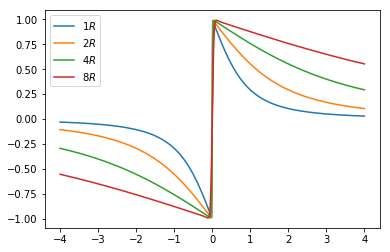

In [23]:
Rs = [1, 2, 4, 8]
for r in Rs:
    get_field(En, r_f = r, dN = 100, z_i = -4, z_f = 4, dz = 1000, l="${}R$".format(r))

Quanto maior o raio, mais linear é a dependência do campo com a distância, tal como esperado. Isto sugere que para $R \rightarrow \infty$, ou seja, o campo gerado por um plano infinito, não dependa da distância.

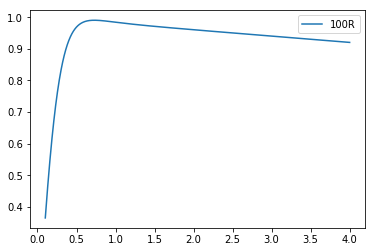

In [24]:
get_field(En, r_f = 50, dN = 100, z_i = .1, z_f = 4, dz = 1000, l="100R")

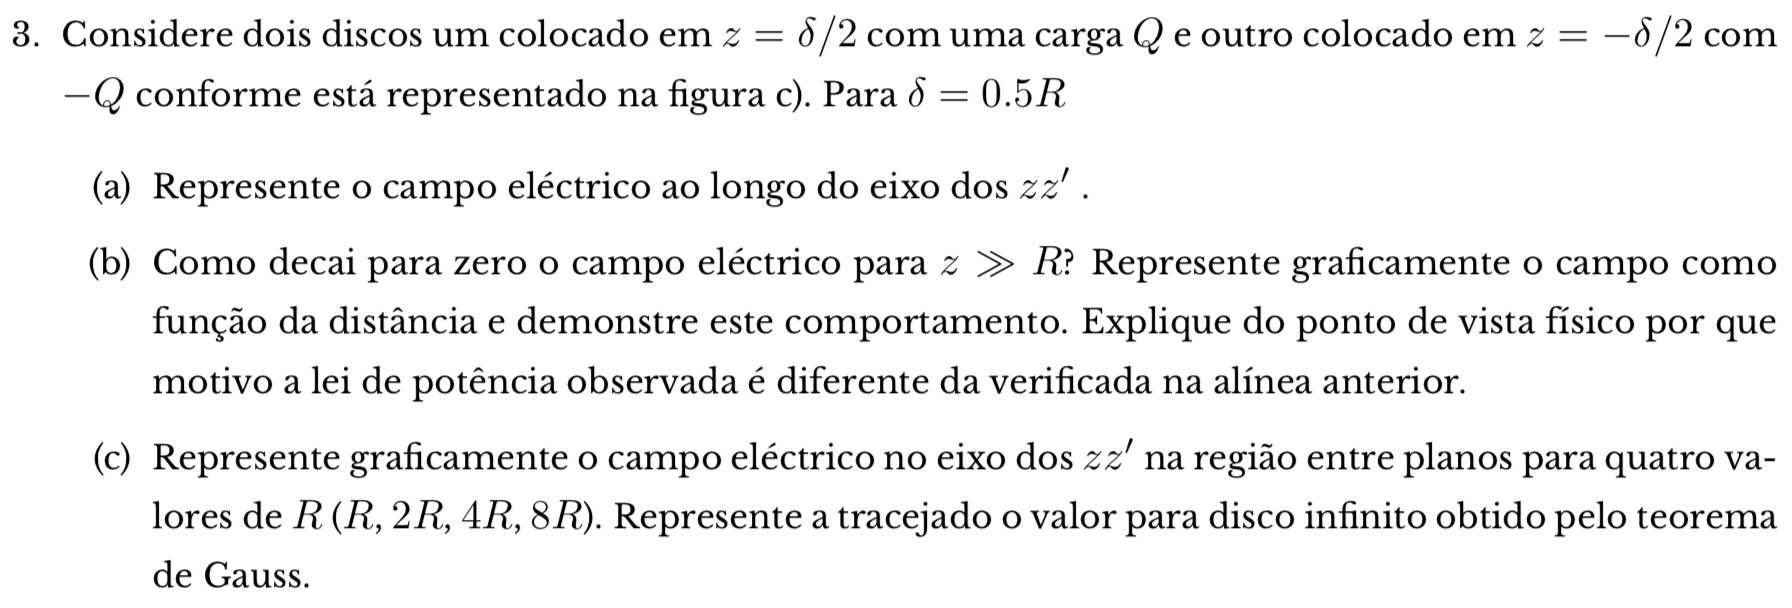

# 1.3.a)

In [25]:
def E3(z, r):
    return En(z, r, r_0 = .5) - En(z, r, r_0 = -.5)

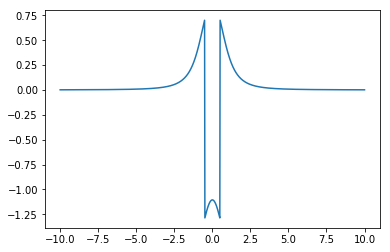

In [26]:
#Placa de raio R = 1
get_field(E3)

Contudo, para uma placa de raio maior, o campo entre as placas é aproximadamente uniforme, como seria de esperar.

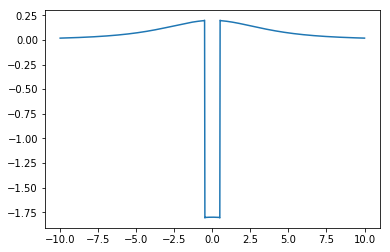

In [27]:
get_field(E3, r_f = 5)

# 1.3.b)
Para cada configuração, fazemos um ajuste para as distâncias $z \in [1R,10R]$ e $z \in [10R,50R]$, respetivamente.

Params: a = 0.4133892296822145, b = -0.006646223707702399, c = 2.010829514813142


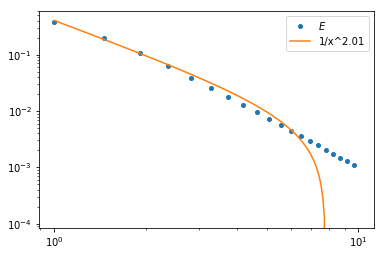

In [28]:
get_fit(E3)

Params: a = 0.9606024990717612, b = -1.921247538335766e-07, c = 2.9866323965172707


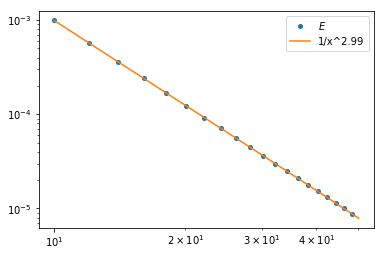

In [29]:
get_fit(E3, z_i = 10, z_f = 50)

A configuração tende com $1/z^3$ para $z>>R$.

# 1.3.c)

Aproximamos o campo uniforme previsto pela Lei de Gauss utilizando um $R$ muito grande.

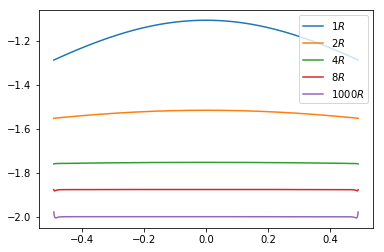

In [30]:
Rs = [1, 2, 4, 8]
for r in Rs:
    get_field(E3, r_f = r, z_i = -.49, z_f = .49, l="${}R$".format(r))
get_field(E3, r_f = 1000, z_i = -.49, z_f = .49, l="$1000R$", dN = 100000)

Reparamos aqui que para R muito grande, é necessario aumentar a precisão do integrador, divindo num número maior de intervalos.

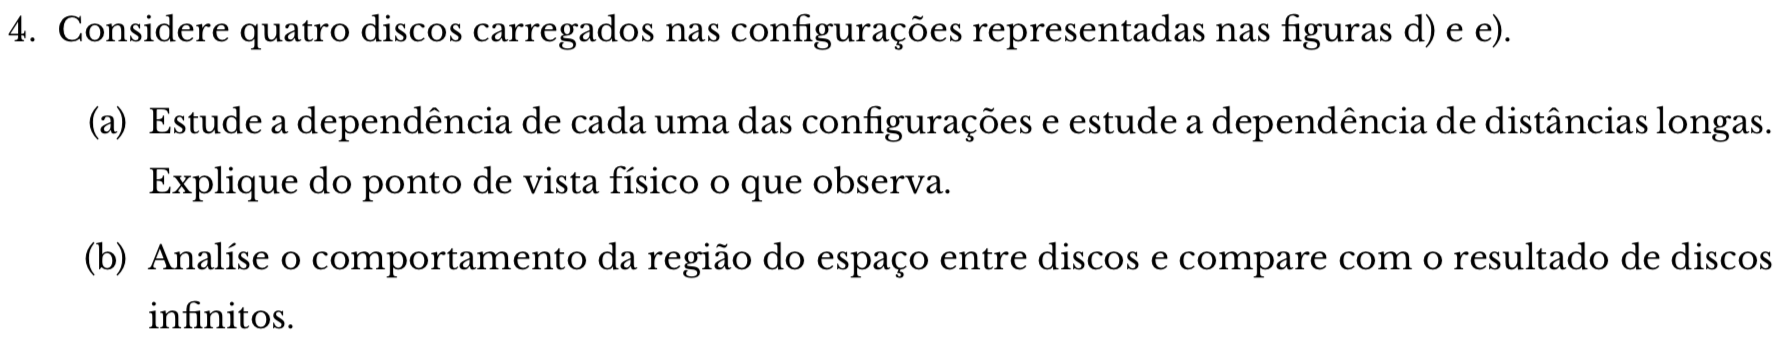

# 1.4.a)

Começamos por desenhar os campos. Os casos a), b) e c) já foram analisados anteriormente.

In [31]:
def E4d(z, r):
    E = - En(z, r, r_0 = .25)
    for i, r_P in enumerate([.5, -.5, -.25]):
        E += (-1)**i * En(z, r, r_0 = r_P)
    return E

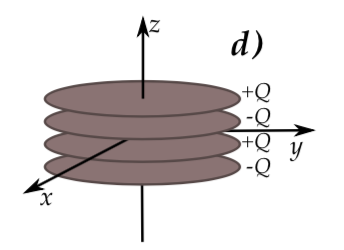

O campo gerado pela configuração d) é:

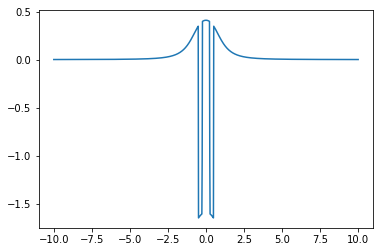

In [32]:
get_field(E4d)

Fazemos ajustes como anteriormente. Para $z \in [1.5R,10R]$ e $z \in [10R,50R]$, respetivamente.

Params: a = 0.28417706480057714, b = -0.0008736188729405646, c = 2.4933418145548605


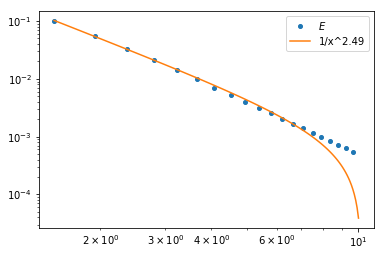

In [33]:
get_fit(E4d, z_i = 1.5)

Params: a = 0.48733965326825435, b = -6.183767500623579e-08, c = 2.9914554599834844


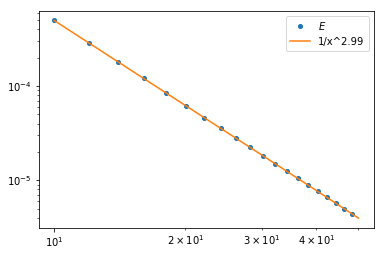

In [34]:
get_fit(E4d, z_i = 10, z_f = 50)

Concluímos que o campo se comporta como o campo de um dipólo, decaindo com $1/z^3$. Isto é o esperado, pois quando suficiente afastado, as cargas do meio anulam-se, e temos efetivamente um dipolo.

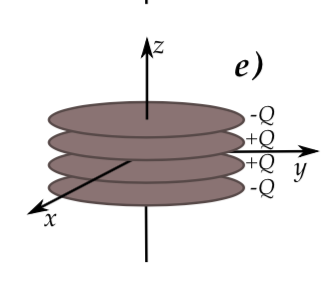

In [35]:
def E4e(z, r):
    E = - En(z, r, r_0 = .5)
    for i, r_P in enumerate([.25, -.5, -.25]):
        E += (-1)**i * En(z, r, r_0 = r_P)
    return E

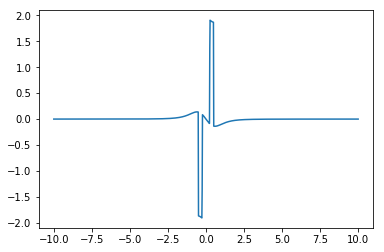

In [36]:
get_field(E4e)

Repetimos o procedimento de ajuste para $z \in [1.5R,10R]$ e $z \in [10R,50R]$, respetivamente.

Params: a = 0.1647845579829669, b = -0.0003862349096184458, c = 2.9628541890333153


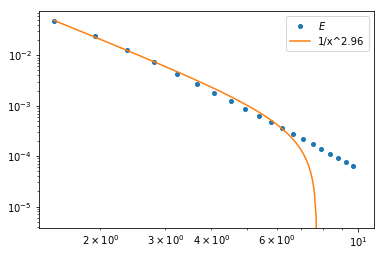

In [37]:
get_fit(E4e, z_i = 1.5)

Params: a = 0.5179608091319818, b = -8.064208076875013e-09, c = 3.9724667877104163


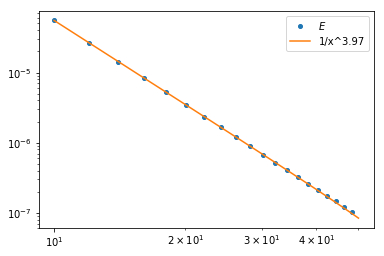

In [38]:
get_fit(E4e, z_i = 10, z_f = 50)

O comportamento, quando suficientemente distante do disco, é o do quadropólo, com $1/z^4$ tal como esperado.

Analisamos agora o comportamento do campo entre os discos para as configurações d) e e), já que a situação c) foi analisada numa alínea anterior.

*Configuração d)*

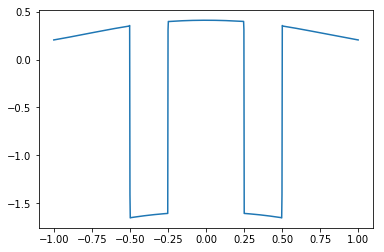

In [39]:
#Configuração d)
get_field(E4d, z_i = -1, z_f = 1)

Nesta configuração vemos campos aproximadamente uniformes entre as placas. Devido à polaridade das placas, temos campos negativo/positivo/negativo, respetivamente. Se aumentarmos o raio das placas, a tendência constante dos campos confirma-se.

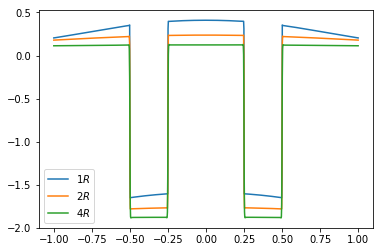

In [40]:
for r in [1, 2, 4]:
    get_field(E4d, z_i = -1, z_f = 1, r_f = r, l="${}R$".format(r))

*Configuração e)*

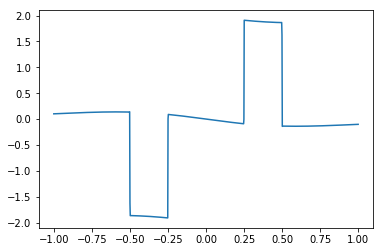

In [41]:
#Configuração d)
get_field(E4e, z_i = -1, z_f = 1)

Mais uma vez o campo é aproximadamente uniforme entre as placas, mas agoro negativo/nulo/positivo, devido à ordem da polarização das placas. Para raios maiores:

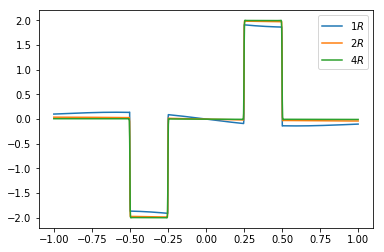

In [42]:
for r in [1, 2, 4]:
    get_field(E4e, z_i = -1, z_f = 1, r_f = r, l="${}R$".format(r))

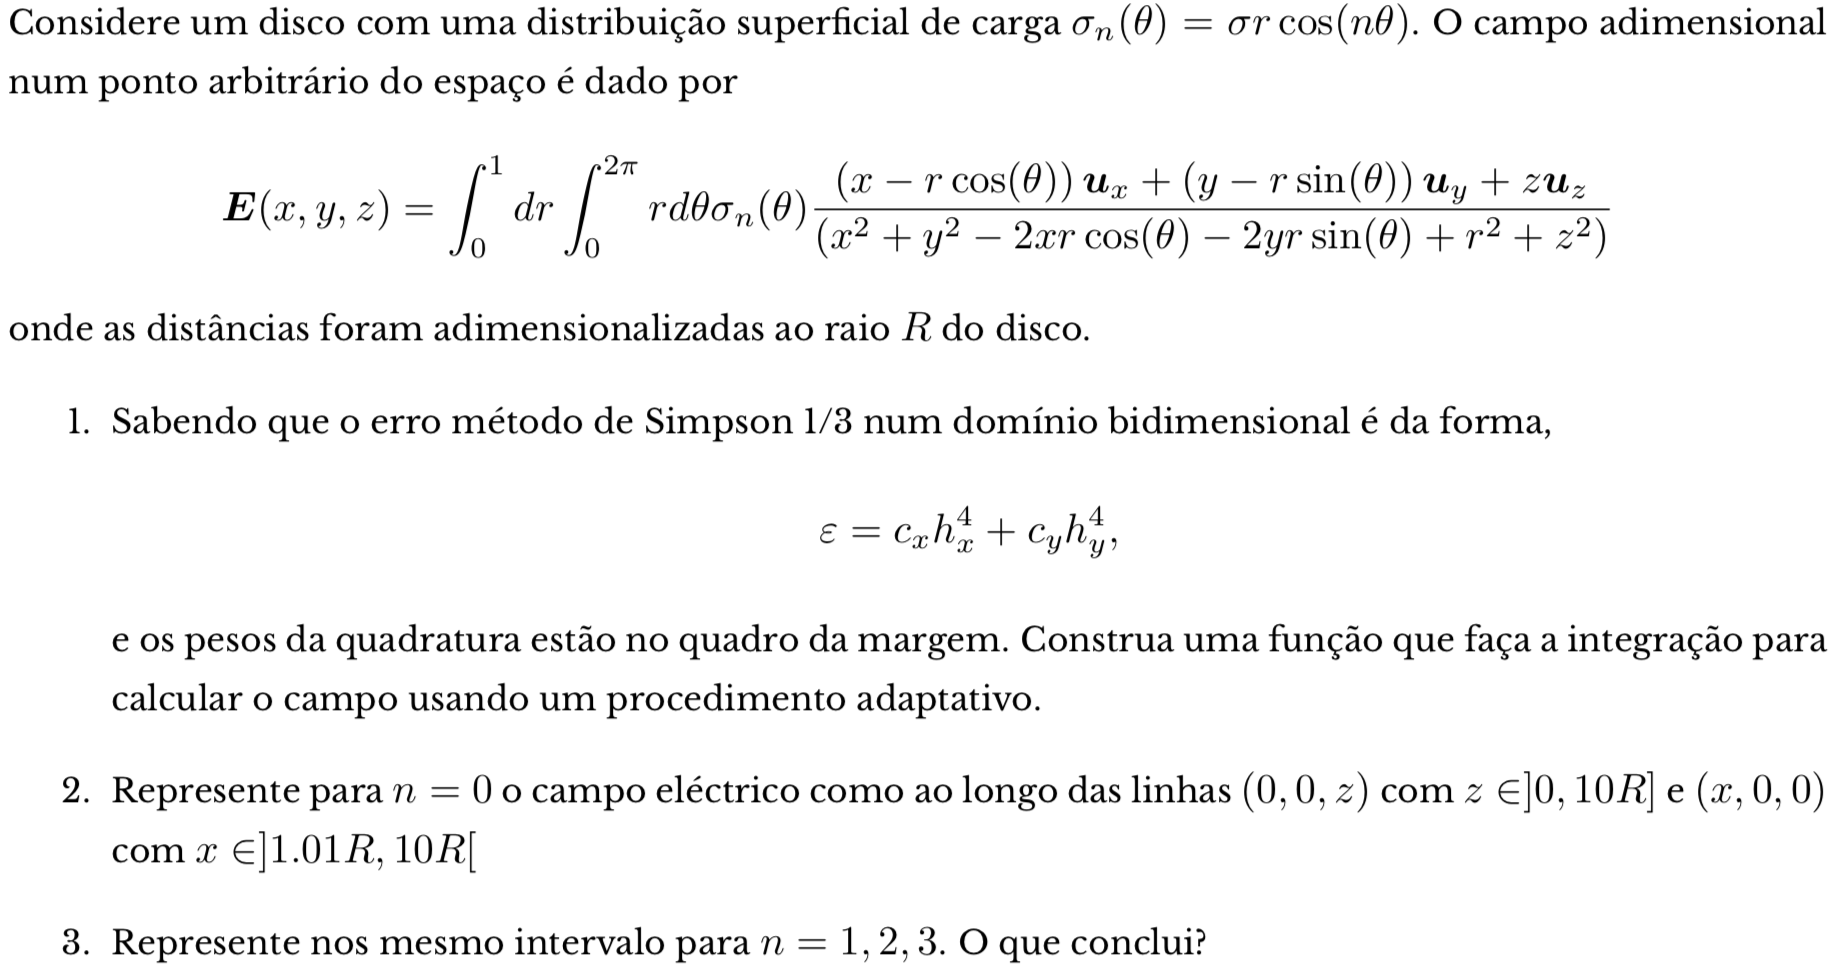

# 2.1)

In [68]:
#Criamos funções para os campos a integrar em cada eixo
def Ex(sigma, r, theta, x, y, z, n = 0):
    d = (x**2 + y**2 -2*x*r*np.cos(theta) - 2*y*r*np.sin(theta) + r**2 + z**2)
    return sigma(r, theta, n) * r * (x - r * np.cos(theta)) / d

def Ey(sigma, r, theta, x, y, z, n = 0):
    d = (x**2 + y**2 -2*x*r*np.cos(theta) - 2*y*r*np.sin(theta) + r**2 + z**2)
    return sigma(r, theta, n) * r * (y - r * np.sin(theta)) / d

def Ez(sigma, r, theta, x, y, z, n = 0):
    d = (x**2 + y**2 -2*x*r*np.cos(theta) - 2*y*r*np.sin(theta) + r**2 + z**2)
    return sigma(r, theta, n) * r * z / d

#Funcao de densidade de carga
def sigma(r, theta, n):
    return r * np.cos(n * theta)

#Funcao geradora da matriz de pesos de Simpson
def get_weigth(l):
    ws = np.empty(l)
    ws[0], ws[-1] = 1, 1
    ws[1:-1:2] = 4
    ws[2:-1:2] = 2
    return ws

#Funcao integradora para a posicao (x, y, z)***
def simpson_2d(E, sigma, x, y, z, n = 0, r_i = 0, r_f=1, theta_i=0, theta_f=2*np.pi, N=100):
    N = N // 2 * 2
    hr = (r_f-r_i)/N
    ht = (theta_f-theta_i)/N
    rs = np.linspace(r_i, r_f, N + 1)
    thetas = np.linspace(theta_i, theta_f, N + 1)
    rr, tt = np.meshgrid(rs, thetas)
    wr, wt = get_weigth(N + 1), get_weigth(N + 1)
    W = np.meshgrid(wr, wt)
    z = E(sigma, rr, tt, x, y, z, n)
    return hr * ht / 9 * (z * W).sum()

#Iterador para limitar o erro do integral.
def iter_int(E, sigma, x, y, z, n = 0, r_i = 0, r_f=1, theta_i=0, theta_f=2*np.pi, N=100, er=1e-4):
    I1 = simpson_2dit(E,sigma,x,y,z, n=n, r_i=r_i, r_f=r_f, theta_i=theta_i, theta_f=theta_f, N=N)
    I2 = simpson_2dit(E,sigma,x,y,z, n=n, r_i=r_i, r_f=r_f, theta_i=theta_i, theta_f=theta_f, N=2*N)
    e = 1/ 15 * (I2 - I1)
    while abs(e) > er:
        N *= 2
        I1, I2 = I2, simpson_2dit(E,sigma,x,y,z, n=n, r_i=r_i, r_f=r_f, theta_i=theta_i, theta_f=theta_f, N=2*N)
        e = 1/ 15 * (I2 - I1)
    return I2, e

Exemplo de um integral interado com o respetivo erro.

# 2.2)

A componente $E_x$

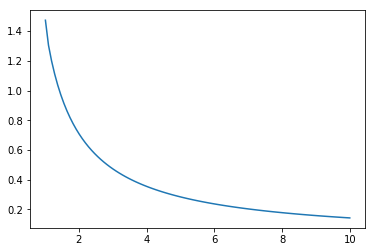

In [69]:
Xs = np.linspace(1.01, 10, 100)
E = .0 * Xs
for i, x in enumerate(Xs):
    E[i] = simpson_2d(Ex, sigma, x, 0, 0)
plt.plot(Xs, E)

Aqui podemos confirmar, como previsto anteriormente, que o campo decai com uma dependência em $1/x$.

Params: a = 1.4155486535862087, b = 1.3658749765367276e-05, c = 1.0004238002751968


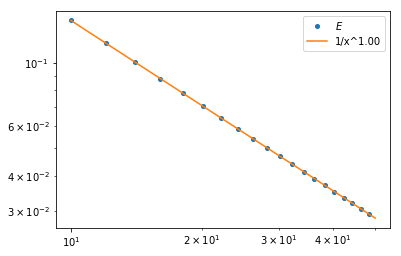

In [70]:
Xs = np.linspace(10, 50, 100)
E = np.linspace(10, 50, 100)
for i, x in enumerate(Xs):
    E[i] = simpson_2d(Ex, sigma, x, 0, 0)
#Constuimos uma função que  parametrize e desenhe um ajuste.
w, w_ = opt.curve_fit(fit_func, Xs, E, p0=[1, 0, 2])
W = fit_func(Xs, w[0], w[1], w[2]) 
plt.plot(Xs[::5], E[::5], label="$E$", marker="o", markersize=4, linestyle="")
plt.plot(Xs, W, label = "1/x^{:.2f}".format(w[2]))
plt.yscale("log")
plt.xscale("log")
plt.legend()
print("Params: a = {0}, b = {1}, c = {2}".format(w[0], w[1], w[2]))


A componente $E_y$

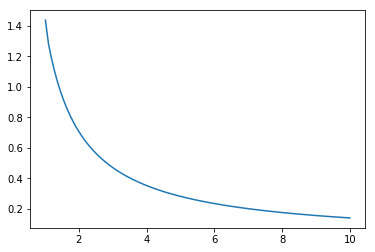

In [44]:
Xs = np.linspace(1.01, 10, 100)
E = .0 * Xs
for i, x in enumerate(Xs):
    E[i] = simpson_2d(Ey, sigma, 0, x, 0)
plt.plot(Xs, E)

A componente $E_z$

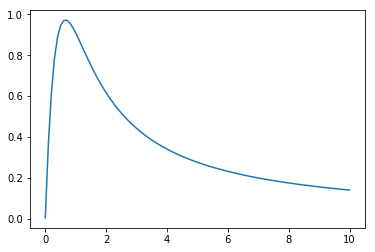

In [334]:
Xs = np.linspace(.001, 10, 100)
E = .0 * Xs
for i, x in enumerate(Xs):
    E[i] = simpson_2d(Ez, sigma, 0, 0, x)
plt.plot(Xs, E)

# 2.c)

A componente $E_z$.

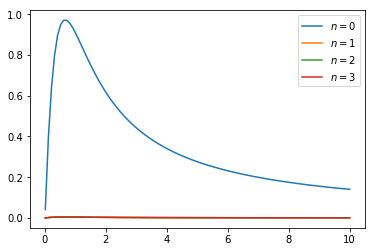

In [316]:
Xs = np.linspace(.01, 10, 100)
E = .0 * Xs
for k in [0, 1, 2, 3]:
    for i, x in enumerate(Xs):
        E[i] = simpson_2d(Ez, sigma, 0, 0, x, n = k)
    plt.plot(Xs, E, label="$n = ${}".format(k))
plt.legend()

Para $n > 0$ o campo tende para zero. Isto é esperado pois integramos $ \cos \theta$ de $0$ a $2\pi$.

Segundo $E_x$.

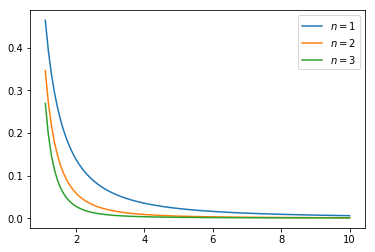

In [356]:
Xs = np.linspace(1.1, 10, 100)
E = .0 * Xs
for k in [1, 2, 3]:
    for i, x in enumerate(Xs):
        E[i] = simpson_2d(Ex, sigma, x, 0, 0, n = k)
    plt.plot(Xs, E, label="$n = ${}".format(k))
plt.legend()

O campo diminui com o aumento de $n$. Este é o comportamento esperado.

***NOTA: Reparei que a convergência do integral é mais lenta do que seria de esperar (e comparando com a versão que integra cada eixo iteradamente que testei). Contudo, acredito que seja um pequeno problema com o integrador que não tive tempo de diagnosticar.